# Exploring the relationship of Foreign Direct Investment and GDP Growth
This data exploration project will seek to find trends in FDIs (Foreign Direct Investments)


In [2]:
import pandas as pd  #necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
import seaborn as sns

## Data
The world bank has an abundance of data, including data on FDIs. Here we'll upload FDI data from the past 20 years. 

In [3]:
fdi=pd.read_csv('FDI_20_years.csv')
indexes=fdi[217:264]
fdi=fdi[:216] # removing unnecessary rows
fdi.index=fdi['Country Code']
fdi=fdi.drop(['Series Name','Series Code', 'Country Name','Country Code'], axis=1)
col=[]
for i in fdi:   #renaming column labels
    splits=i.split(' ')
    col.append(splits[0])
fdi.columns=col 
fdi.replace('..',np.nan,inplace=True)  #cleaning missing values
fdi.replace('0',np.nan,inplace=True)
fdi=fdi.dropna(thresh=16)  #dropping rows with more than four missing values
fdi=fdi.astype(float)
fdi['average']=fdi.mean(numeric_only=True, axis=1) #adding an average column
fdi=fdi/1000000000  
fdi=fdi.round(1)

## Histogram of FDIs
It appears there are some extreme outliers with some coutries recieving far more FDIs. 

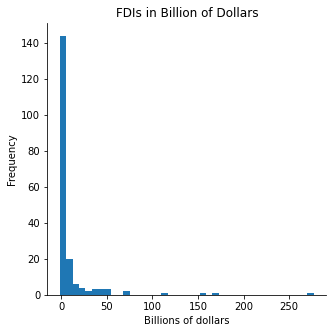

In [4]:
f, ax=plt.subplots(1, figsize=(5,5))
plt.hist(fdi['average'],bins=40)
plt.title('FDIs in Billion of Dollars')
plt.xlabel("Billions of dollars")
plt.ylabel("Frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Visualizing and identifying countries with high FDIs
Countries that have an average of above 60 billion dollars for the past 20 years in FDIs will be isolated and then mapped. 

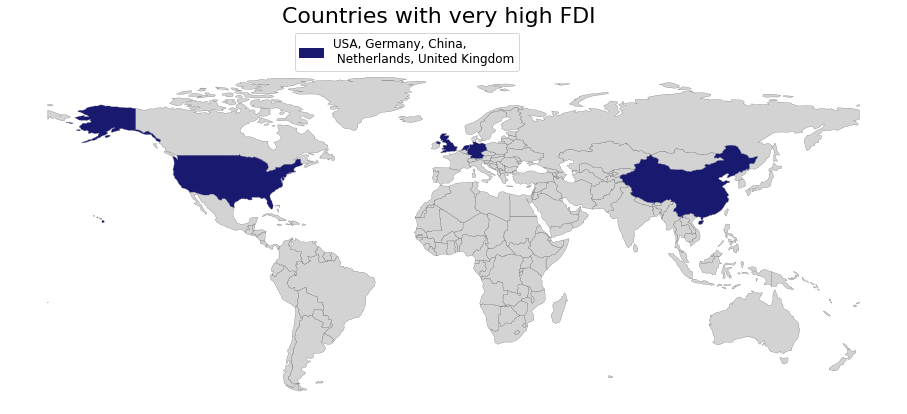

In [5]:
high_fdi=fdi[fdi['average']>60]
high_country_code=high_fdi.index
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #getting the world map from geopandas
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
geo_high_fdi=[]
for i,r in world.iterrows(): #getting the polygons of the identified countries
    if r.iso_a3 in high_country_code:
        geo_high_fdi.append(r)
geo_high_fdi=pd.DataFrame(geo_high_fdi)
geo_high_fdi.index=geo_high_fdi['iso_a3']
geo_high_fdi=geo_high_fdi['geometry']
geo_high_fdi=gpd.GeoDataFrame(geo_high_fdi)
f, ax=plt.subplots(1, figsize=(16,16)) #plotting the base world map and identified countries
ax=world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=.15)
geo_high_fdi.plot(ax=ax,color='midnightblue',edgecolor='white',linewidth=.15)
f.suptitle('Countries with very high FDI', y=.70, size=22)
r=mpatches.Patch(color='midnightblue',label='USA, Germany, China,\n Netherlands, United Kingdom')
plt.legend(handles=[r],bbox_to_anchor=(.58,1.1),fontsize=12)
ax.set_axis_off()

## Histogram of FDIs under 60 billion dollars
There are still some extreme outliers after removing the top 5 countries. The majority of FDIs are below 15 billion dollars

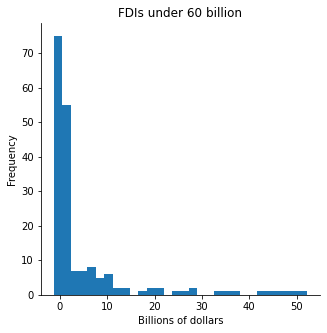

In [6]:
fdi=fdi[fdi['average']<60]
f, ax=plt.subplots(1, figsize=(5,5))
plt.hist(fdi['average'],bins=30)
plt.title('FDIs under 60 billion')
plt.xlabel("Billions of dollars")
plt.ylabel("Frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Plotting countries with FDI less than 10 billion dollars
There results are what we would expect. This map shows countries with FDIs that average less that 10 billion dollars.  

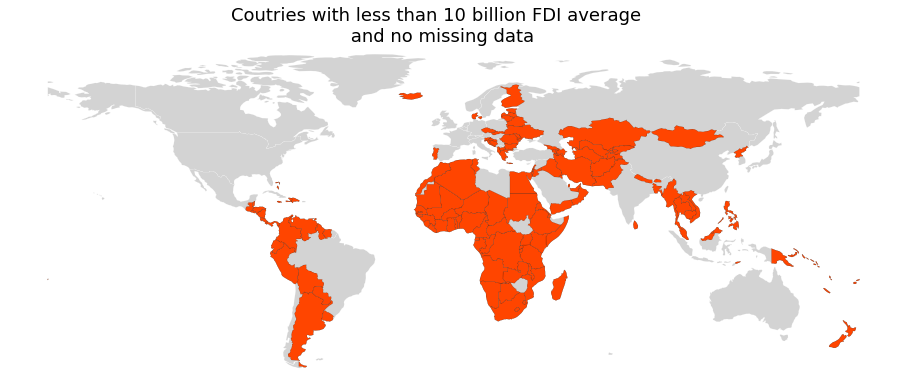

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
geo_high_fdi=[]
for i,r in world.iterrows():
    if r.iso_a3 in high_country_code:
        geo_high_fdi.append(r)
geo_high_fdi=pd.DataFrame(geo_high_fdi)
geo_high_fdi.index=geo_high_fdi['iso_a3']
geo_high_fdi=geo_high_fdi['geometry']
geo_high_fdi=gpd.GeoDataFrame(geo_high_fdi)
less_10_b=fdi[fdi['average']<10]
less_10_country_code=less_10_b.index
less_10_plot=[]
for i,r in world.iterrows():
    if r.iso_a3 in less_10_country_code:
        less_10_plot.append(r)
less_10_plot=pd.DataFrame(less_10_plot)
less_10_plot.index=less_10_plot['iso_a3']
less_10_plot=less_10_plot['geometry']
less_10_plot=gpd.GeoDataFrame(less_10_plot)   
f, ax=plt.subplots(1, figsize=(16,16))
ax=world.plot(ax=ax,color='lightgrey',edgecolor='white',linewidth=.15)
less_10_plot.plot(ax=ax,color='orangered',edgecolor='black',linewidth=.15)
f.suptitle('Coutries with less than 10 billion FDI average \n and no missing data',y=.68,size=18)
ax.set_axis_off()

## Importing GDP per capita data
The World Bank also has data for GDP for the past 20 years. 

In [8]:
gdp=pd.read_csv('GDP_cap_20_years.csv')
gdp.index=gdp['Country Code']
gdp=gdp.drop(['Series Name','Series Code','Country Name', 'Country Code'], axis=1) #dropping columns we don't need
col=[]
for i in gdp: #data cleaning
    splits=i.split(' ')
    col.append(splits[0])
gdp.columns=col
gdp.replace('..',np.nan,inplace=True)
gdp=gdp.astype(float)
gdp=pd.DataFrame(gdp)
gdp=gdp.dropna(thresh=16)
gdp=gdp/1000
gdp=gdp.round(2)
gdp=gdp.interpolate(method='linear', limit_direction='both', axis=1)

## Data cleaning
Here we'll make a new column called growth. It will show how much the GDP per capita has risen over the past 20 years. The data will then be divided into 3 groups and mapped out. Then we can simplistically visualize the three broad growth rates.

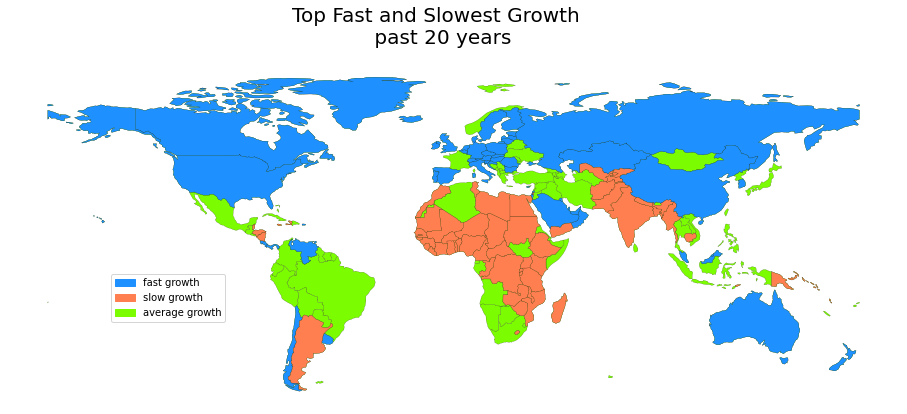

In [9]:
gdp['growth']=gdp['2019'] - gdp['1999']
gdp=gdp.sort_values('growth')
high_gdp_growth=gdp[-82:]  #top third of growth change
low_gdp_growth=gdp[:82]  #bottom third of growth change
high_growth_c_code=high_gdp_growth.index
low_growth_c_code=low_gdp_growth.index
high_growth_plot=[]
low_growth_plot=[]
for i,r in world.iterrows():  #getting the polygon data in order to map
    if r.iso_a3 in high_growth_c_code:
        high_growth_plot.append(r)
    elif r.iso_a3 in low_growth_c_code:
        low_growth_plot.append(r)
high_growth_plot=pd.DataFrame(high_growth_plot)
low_growth_plot=pd.DataFrame(low_growth_plot)
high_growth_plot.index=high_growth_plot['iso_a3']
low_growth_plot.index=low_growth_plot['iso_a3']
high_growth_plot=high_growth_plot['geometry']
low_growth_plot=low_growth_plot['geometry']
high_growth_plot=gpd.GeoDataFrame(high_growth_plot)
low_growth_plot=gpd.GeoDataFrame(low_growth_plot)
f, ax=plt.subplots(1, figsize=(16,16))
ax=world.plot(ax=ax, color='lawngreen', edgecolor='black', linewidth=.15)
high_growth_plot.plot(ax=ax,color='dodgerblue',edgecolor='black', linewidth=.15)
low_growth_plot.plot(ax=ax,color='coral',edgecolor='black', linewidth=.15)
f.suptitle('Top Fast and Slowest Growth \n past 20 years', y=.7, size=20)
r=mpatches.Patch(color='dodgerblue',label='fast growth')
p=mpatches.Patch(color='coral', label='slow growth')
a=mpatches.Patch(color='lawngreen', label='average growth')
plt.legend(handles=[r,p,a],bbox_to_anchor=(.25,.4))
ax.set_axis_off()

## Joining the data
Many rows of GDP data will have to be dropped. We have 247 observations for GDP but only 191 rows for FDI. 

In [10]:
print(gdp.shape)
print(fdi.shape)

(247, 22)
(185, 22)


## Dropping rows
We will only keep country observations that are found in the GDP per capita and FDI datasets. Then we will have two datasets that can be joined because they have the same country observations.

In [11]:
fdi_country_code=fdi.index
for i,r in gdp.iterrows(): #dropping GDP observations that are not in the FDI dataset
    if i not in fdi_country_code:
        gdp=gdp.drop([i])        
gdp_country_code=gdp.index
for i,r in fdi.iterrows(): #dropping FDI observations that are not in the GPD dataset
    if i not in gdp_country_code:
        fdi=fdi.drop([i])
fdi=fdi.sort_index()
gdp=gdp.sort_index()
#fdi.index==gdp.index   

## Creating correlation data
Now that the GDP per capita and FDI time series data is identical we can correlate and sort them. Correlations values that are 1 mean that FDI and GDP growth are perfectly matched. The correlation data will be divided into 3 groups similary like with the GDP data. 

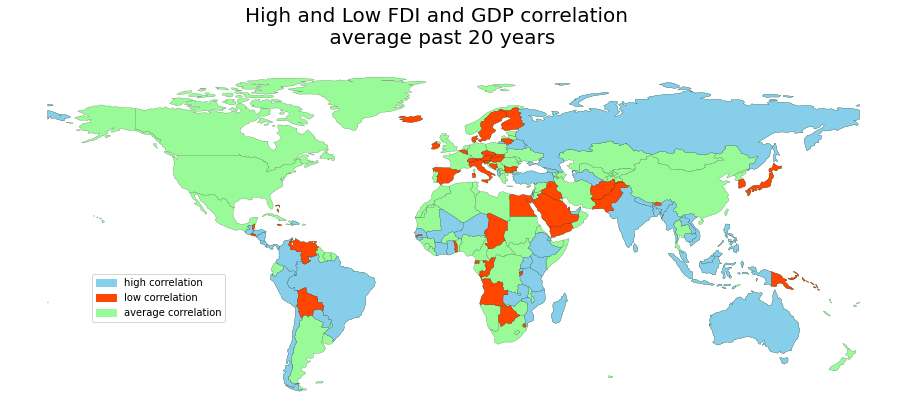

In [12]:
cols=gdp.columns
cols=cols[:-1] #dropping the 'growth' column that was created earlier
gdp=gdp[cols]
fdi=fdi[cols]
corr=gdp.corrwith(fdi,axis=1)
corr=corr.sort_values()
low_corr=corr[:58]
high_corr=corr[-58:]
high_corr_code=high_corr.index
low_corr_code=low_corr.index
high_corr_plot=[]
low_corr_plot=[]
for i,r in world.iterrows():
    if r.iso_a3 in high_corr_code:
        high_corr_plot.append(r)
    elif r.iso_a3 in low_corr_code:
        low_corr_plot.append(r)
high_corr_plot=pd.DataFrame(high_corr_plot)
low_corr_plot=pd.DataFrame(low_corr_plot)
high_corr_plot.index=high_corr_plot['iso_a3']
low_corr_plot.index=low_corr_plot['iso_a3']
high_corr_plot=high_corr_plot['geometry']
low_corr_plot=low_corr_plot['geometry']
high_corr_plot=gpd.GeoDataFrame(high_corr_plot)
low_corr_plot=gpd.GeoDataFrame(low_corr_plot)        
f, ax=plt.subplots(1, figsize=(16,16))
ax=world.plot(ax=ax, color='palegreen', edgecolor='black', linewidth=.15)
high_corr_plot.plot(ax=ax,color='skyblue', edgecolor='black', linewidth=.15)
low_corr_plot.plot(ax=ax,color='orangered', edgecolor='black', linewidth=.15)
f.suptitle('High and Low FDI and GDP correlation \n average past 20 years', y=.7, size=20)
r=mpatches.Patch(color='skyblue',label='high correlation')
p=mpatches.Patch(color='orangered', label='low correlation')
a=mpatches.Patch(color='palegreen', label='average correlation')
plt.legend(handles=[r,p,a],bbox_to_anchor=(.25,.4))
ax.set_axis_off()

## South America
This continent will be ideal for further investigation. It has diversity in its correlation while not having too many observations to explore.

Country Correlation
VEN   -0.171453
BOL    0.125872
SUR    0.332386
ARG    0.445901
ECU    0.460697
URY    0.489510
GUY    0.620870
CHL    0.690608
PER    0.813846
PRY    0.833239
BRA    0.919311
COL    0.922764
Name: corr, dtype: float64


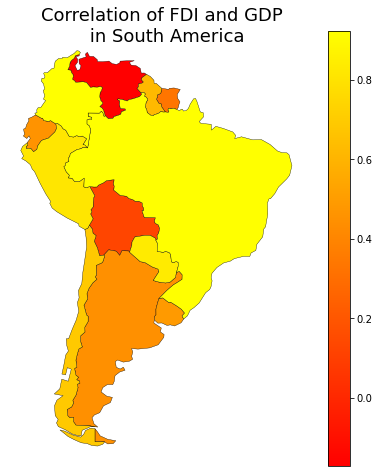

In [13]:
sa=world[world['continent']=='South America']
sa.index=sa['iso_a3']
sa=sa['geometry']
sa=gpd.GeoDataFrame(sa)
sa_code=sa.index
sa_fdi=[]
for i,r in fdi.iterrows():
    if i in sa_code:
        sa_fdi.append(r)
sa_gdp=[]
for i,r in gdp.iterrows():
    if i in sa_code:
        sa_gdp.append(r)
sa_fdi=pd.DataFrame(sa_fdi)
sa_gdp=pd.DataFrame(sa_gdp)
corr=gdp.corrwith(fdi,axis=1)
corr=corr.sort_values()
sa_corr=sa_gdp.corrwith(sa_fdi, axis=1)
sa_corr=sa_corr.sort_index()
sa=sa.drop(['FLK'])  # Falkland Islands need to be dropped
sa=sa.sort_index()
sa.index==sa_corr.index
sa=sa.rename_axis('Country Correlation')
sa_corr=gpd.GeoDataFrame(sa_corr)
sa=sa.join(sa_corr)
sa=sa.rename(columns={0:'corr'})
sa=sa.sort_values('corr')
f,ax=plt.subplots(1,1,figsize=(8,8))
sa.plot(ax=ax,column='corr',legend=True,cmap='autumn',edgecolor='black', linewidth=.35)
f.suptitle('Correlation of FDI and GDP \n in South America', y=.922, size=18)
ax.set_axis_off()
print(sa['corr'])

## Plotting the 20 years of FDIs and GDP per capita
To visualize the correlation of GDP and FDI over 20 years we will pick the two countries with the highest correlation (Colombia and Brazil) and the two with the lowest (Bolivia and Venezuela). 

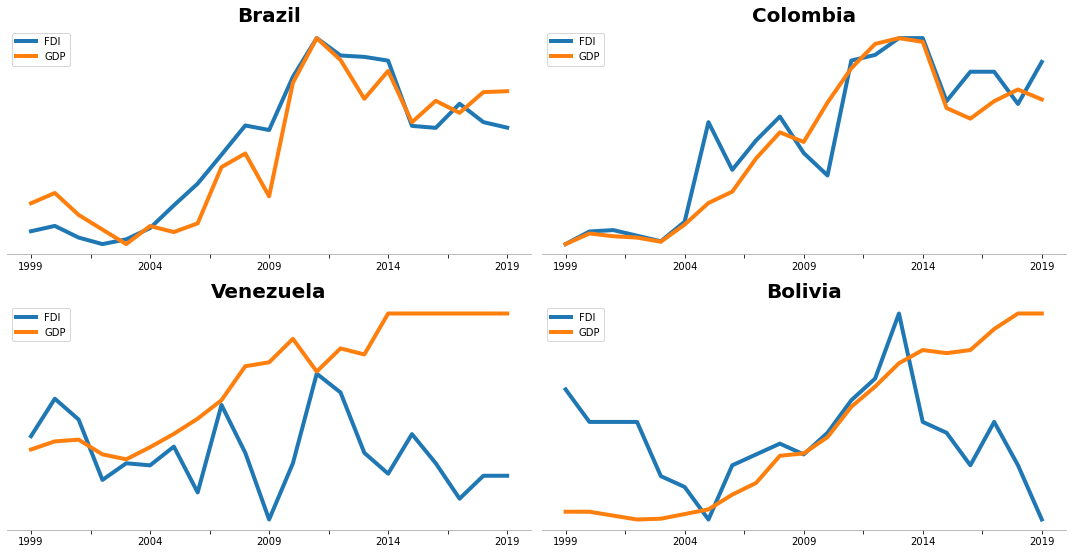

In [14]:
sa_fdi=fdi.loc[['BRA','COL','BOL','VEN']]
sa_gdp=gdp.loc[['BRA','COL','BOL','VEN']]
bf=pd.DataFrame(sa_fdi.loc['BRA'])
bg=pd.DataFrame(sa_gdp.loc['BRA'])
Brazil=pd.concat([bg,bf],axis=1)
Brazil.columns=['FDI','GDP']
Brazil=(Brazil-np.min(Brazil))/(np.max(Brazil)-np.min(Brazil))
cf=pd.DataFrame(sa_fdi.loc['COL'])
cg=pd.DataFrame(sa_gdp.loc['COL'])
Colombia=pd.concat([cf,cg],axis=1)
Colombia.columns=['FDI','GDP']
Colombia=(Colombia-np.min(Colombia))/(np.max(Colombia)-np.min(Colombia))
bof=pd.DataFrame(sa_fdi.loc['BOL'])
bog=pd.DataFrame(sa_gdp.loc['BOL'])
Bolivia=pd.concat([bof,bog],axis=1)
Bolivia.columns=['FDI','GDP']
Bolivia=(Bolivia-np.min(Bolivia))/(np.max(Bolivia)-np.min(Bolivia))
vf=pd.DataFrame(sa_fdi.loc['VEN'])
vg=pd.DataFrame(sa_gdp.loc['VEN'])
Venezuela=pd.concat([vf,vg],axis=1)
Venezuela.columns=['FDI','GDP']
Venezuela.loc['2019','FDI']=1 #filling in a missing cell
Venezuela=(Venezuela-np.min(Brazil))/(np.max(Venezuela)-np.min(Venezuela))
fig, ax=plt.subplots(2,2)
fig.set_size_inches(15,7.8)
fig.subplots_adjust(wspace=0.2)
Brazil.plot(ax=ax[0,0],linewidth=4)
Colombia.plot(ax=ax[0,1],linewidth=4)
Venezuela.plot(ax=ax[1,0],linewidth=4)
Bolivia.plot(ax=ax[1,1],linewidth=4)
ax[0,0].set_title('Brazil',size=20,weight="bold")
ax[0,0].legend(loc='upper left')
ax[0,1].set_title('Colombia',size=20,weight="bold")
ax[1,0].set_title('Venezuela',size=20,weight="bold")
ax[1,1].set_title('Bolivia',size=20,weight="bold")
for ax in fig.axes:
    plt.sca(ax) 
    plt.yticks([])
    sns.despine(left=True)
    ax.spines['bottom'].set_edgecolor("#AAAAAA")
    ax.spines['left'].set_edgecolor("#AAAAAA")
plt.tight_layout()

## FDI by sector
To understand how FDIs affect the economy better it will be necessary to see in what industries they are invested in. 
[Colombia's central bank](http://www.banrep.gov.co/es/estadisticas/inversion-directa) and [Bolivia's central Bank](https://www.bcb.gob.bo/webdocs/publicacionesbcb/2018/11/21/CPE_jun-18.pdf) publish FDIs by industry. The financial company [Banco Santander]('https://santandertrade.com/en/portal/establish-overseas/brazil/foreign-investment') has a recent report on Brazil. Recent data on Venezuela wasn't found and therefore decade old figures are used. [Wikipedia](https://es.wikipedia.org/wiki/Inversi%C3%B3n_extranjera_directa_en_Am%C3%A9rica_Latina#Inversi%C3%B3n_Extranjera_Directa_Venezuela) states that that 56% of Venezuelas's FDIs in 2012 were in the oil industry and the [World Trade Organization](https://www.google.com/search?q=WT%2FTPR%2FS%2F10+venezuela+industry+fdi&rlz=1C1CHZL_enRU897RU898&oq=WT%2FTPR%2FS%2F10+venezuela+industry+fdi&aqs=chrome..69i57j69i58.4274j0j7&sourceid=chrome&ie=UTF-8) published a report in 2010 of FDIs in other industrial sectors. 

Some clear trends are spotted. Colombia and Brazil have in FDIs more evenly distributed while Venezuela and Bolivia are mainly focused on natural resources. 

It should be noted that I took many liberties in making these graphs. The data wasn't consistent nor complete and they are only meant to give a general impression.  

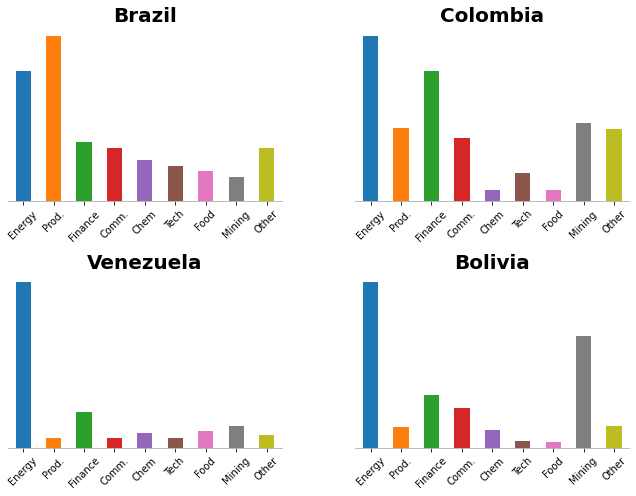

In [24]:
sector=pd.read_csv('sector.csv')
sector=sector.iloc[:-1,:5] #removing blank spaces
sector.index=sector['FDI']
sector=sector.iloc[:,1:] #removing blank spaces
sector=sector.rename(index={'Oil, Gas, or Electricty ':'Energy','Manufacturing':'Prod.',
                              'Financial services':'Finance','Commerce':'Comm.','Chemical ':'Chem',
                            'IT':'Tech','Foodstuffs':'Food'})
sector=sector.rename_axis('')
bar_palette = sns.color_palette(n_colors=9)
fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,7)
fig.subplots_adjust(wspace=15)
sector['Brazil'].plot(ax=ax[0,0],kind='bar',color=bar_palette)
sector['Colombia'].plot(ax=ax[0,1],kind='bar',color=bar_palette)
sector['Venezuela'].plot(ax=ax[1,0],kind='bar',color=bar_palette)
sector['Bolivia'].plot(ax=ax[1,1],kind='bar',color=bar_palette)
ax[0,0].set_title('Brazil',size=20,weight="bold")
ax[0,1].set_title('Colombia',size=20,weight="bold")
ax[1,0].set_title('Venezuela',size=20,weight="bold")
ax[1,1].set_title('Bolivia',size=20,weight="bold")
for ax in fig.axes:
    plt.sca(ax)
    plt.yticks([])
    plt.xticks(rotation=45)
    sns.despine(left=True)
    ax.spines['bottom'].set_edgecolor("#AAAAAA")
plt.tight_layout()

## Explaining industry difference
Part of the discrepancy in industry investment can be explained by other dynamics in the countries. The [World Bank](https://www.doingbusiness.org/en/rankings) publishes data on how easy it is for business to operate. I displayed the data as a percentile with 1 being a perfect score. [Transparency International](https://www.transparency.org/en/countries/afghanistan?redirected=1) publishes data on corruption with one being complete corruption. Additionally, I added the correlation from FDIs and GDP per capita. 

The conclusion being countries that have strong institutions will attract more foreign investments. However, some opportunities, such as natural resources, will be so alluring that foreigners will invest despite the country's weak institutions. 

In [16]:
ease=pd.read_excel('ease_ranking.xlsx')
ease.index=ease.Economy
ease=pd.DataFrame(ease['globalRank'])
ease=pd.DataFrame(ease.dropna())
ease=pd.DataFrame(ease['globalRank'].astype(int))
ease_four=ease.loc[['Colombia','Brazil','Bolivia','Venezuela, RB']]
ease_four['Ease of Doing Business (percentile)']=ease_four['globalRank']
four=pd.DataFrame(ease_four.iloc[:,1])
four=four.rename_axis('')
four['Corruption Level (percentile)']=0
four.iloc[1,1]=106
four.iloc[0,1]=96
four.iloc[2,1]=123
four.iloc[3,1]=173
four['Corr GDP and FDI']=[0.92,.91,.13,-.17]
four.iloc[:,0]=four.iloc[:,0]/191
four.iloc[:,1]=four.iloc[:,1]/180
four.iloc[:,0]=1-four.iloc[:,0]
four=four.round(2)
four

,Ease of Doing Business (percentile),Corruption Level (percentile),Corr GDP and FDI
,,,
Colombia,0.65,0.53,0.92
Brazil,0.35,0.59,0.91
Bolivia,0.21,0.68,0.13
"Venezuela, RB",0.02,0.96,-0.17
